In [11]:
import pyvista as pv
import numpy as np
import os, flopy
import matplotlib.pyplot as plt
name = 'Model'
workspace = '../model'
mf_exe_name = '../exe/mf6'

fname = os.path.join(workspace, name + '.disv.grb')
grd = flopy.utils.MfGrdFile(fname, verbose=False)
iverts, verts = grd.get_verts()
vertc = grd.get_centroids()
mg = grd.get_modelgrid()

fname = os.path.join(workspace, name + '.hds')
hdobj = flopy.utils.HeadFile(fname)
head = hdobj.get_data()
head

array([[[ 3.52233842e+03,  3.52560562e+03, -1.00000000e+30, ...,
          4.46012798e+03,  4.45992751e+03,  4.45621146e+03]],

       [[ 3.52233884e+03,  3.52560604e+03, -1.00000000e+30, ...,
          4.45525009e+03,  4.45468235e+03,  4.45394567e+03]],

       [[ 3.52233942e+03,  3.52560665e+03,  3.61110128e+03, ...,
          4.44993259e+03,  4.44956228e+03,  4.44910746e+03]],

       [[ 3.52234046e+03,  3.52560772e+03,  3.61110982e+03, ...,
          4.44477262e+03,  4.44439135e+03,  4.44394319e+03]],

       [[ 3.52234175e+03,  3.52560906e+03,  3.61113751e+03, ...,
          4.44111155e+03,  4.44070635e+03,  4.44023812e+03]],

       [[ 3.52234252e+03,  3.52560987e+03,  3.61116117e+03, ...,
          4.43949712e+03,  4.43908344e+03,  4.43860721e+03]]])

In [12]:
head[:,0,100]

array([-1.00000000e+30, -1.00000000e+30,  4.22921042e+03,  4.22919723e+03,
        4.22915104e+03,  4.22910026e+03])

<a list of 4183 text.Text objects>

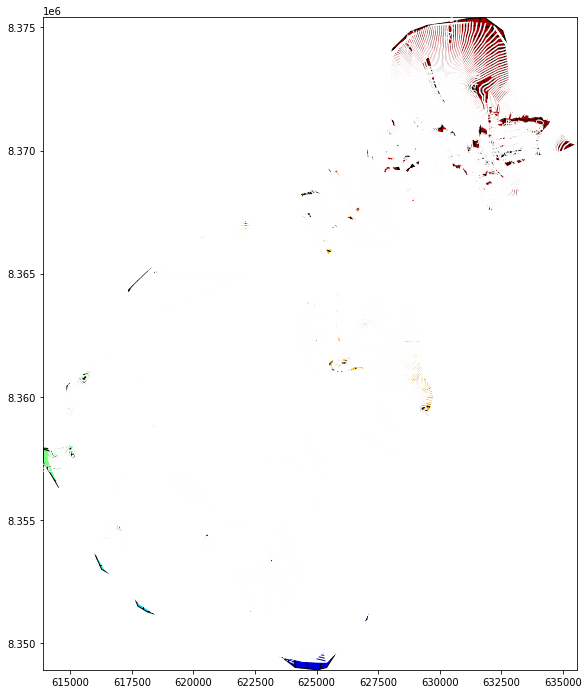

In [15]:
ilay = 4
cint = .25
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
mm = flopy.plot.PlotMapView(modelgrid=mg, ax=ax)
ax.set_xlim(mg.extent[0], mg.extent[1])
ax.set_ylim(mg.extent[2], mg.extent[3])
v = mm.plot_cvfd(verts, iverts, edgecolor='black', a=head[ilay, 0, :],cmap='jet')
hmin = head[ilay, 0, :].min()
hmax = head[ilay, 0, :].max()
levels = np.arange(np.floor(hmin), np.ceil(hmax) + cint, cint)
cs = mm.contour_array_cvfd(vertc, head[ilay, 0, :], colors='white',levels=levels)
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=11)
#cb = plt.colorbar(v, shrink=0.5)
#t = ax.set_title('Model Layer {}; hmin={:6.2f},hmax={:6.2f}'.format(ilay + 1, hmin, hmax))

In [4]:
import os, json
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Open vector and raster files
vorMesh = gpd.read_file('../shps/voronoiGrid.shp')

# Get grid index
intervalNumber = 5
meshBounds = vorMesh.total_bounds
gridXarray = np.linspace(meshBounds[0],meshBounds[2],intervalNumber+1)
gridYarray = np.linspace(meshBounds[1],meshBounds[3],intervalNumber+1)
totalVerticesList = []
for index,row in tqdm(vorMesh.iterrows(), total= vorMesh.shape[0]):
    #vertices xy
    coords = row.geometry.exterior.coords.xy
    totalVerticesList += list(zip(coords[0],coords[1]))

uniqueVerticesArray = np.unique(np.array(totalVerticesList),axis=0)

100%|██████████| 49526/49526 [00:08<00:00, 5654.94it/s]


In [42]:
for vertex in row.geometry.exterior.coords:
    print(list(vertex))

[629270.7836780605, 8369867.31575687]
[629275.0359550011, 8369851.40579515]
[629274.5729495471, 8369850.8861980075]
[629251.0069767555, 8369849.771089327]
[629253.517790857, 8369870.209448816]
[629269.3294652683, 8369869.187177871]
[629270.7836780605, 8369867.31575687]


In [38]:
%timeit np.where((uniqueVerticesArray == 613903.5641560691))

560 µs ± 780 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
uniqueVerticesList = uniqueVerticesArray.tolist()
uniqueVerticesList[:5]

[[613882.5067587458, 8357372.451446082],
 [613902.1036789014, 8357884.305352164],
 [613903.5641560691, 8357922.451700522],
 [614042.608778378, 8357126.589166521],
 [614192.7796630668, 8357185.8306260845]]

In [37]:
%timeit uniqueVerticesList.index([613903.5641560691, 8357922.451700522])

183 ns ± 0.748 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [45]:
for a in range(2,3):
    print(a)

2


In [49]:
list(range(2,5))

[2, 3, 4]

In [50]:
a = [2,2]
2 in a

True